<a href="https://colab.research.google.com/github/not-sid-29/ocr_mnist_detect/blob/main/OCR_GradioApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Setups
!pip install --q torch
!pip install --q torchvision
!pip install --q gradio
!pip install --q fastai
!pip install --q timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/

In [21]:
import timm
import gradio as gr
from fastai.vision.all import *

#Loading the models
mnist_convnet = load_learner("/content/mnist_finetuned_convnext.pkl")
mnistnet = load_learner("/content/mnistnet.pkl")

def preprocess_inputs(image):
  if not isinstance(image, PILImage):
    image = PILImage.create(image)

  image = image.resize((28, 28))
  return image

def predict(image, model_name):

  if model_name == "MNIST Finetuned ConvNeXT model":
    image = preprocess_inputs(image)
    mnist_preds, _, _ = mnist_convnet.predict(image)
    return mnist_preds

  if model_name == "MNISTNet(A custom designed model)":
    image = preprocess_inputs(image)
    image = image.convert("L")
    outputs= mnistnet.predict(image)
    probability = F.softmax(outputs[1], dim=-1)
    preds = torch.argmax(probability, dim=-1)
    label = mnistnet.dls.vocab[preds]
    return label

'8'

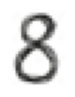

In [16]:
demo_img = PILImage.create('/content/sample_8.jpg')
demo_img.thumbnail((28, 28))
demo_img.show()
predict(demo_img, "MNISTNet")


In [22]:
## Building gradio interface:

interface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Image(type='pil', label="Input Image"),
        gr.Radio(["MNIST Finetuned ConvNeXT model", "MNISTNet(A custom designed model)"], label="Choose Model")
    ],
    outputs=gr.Textbox(),
    title="Optical Character Recognition on handwritten numbers"
)

interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://7208ee1307d4128fd6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
